In [1]:
import sqlite3
import pandas as pd

In [2]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

In [3]:
def read_as_df(conn):
    df = pd.read_sql_query("select * from beacon;", conn)
    return df

In [130]:
def main():
    database = "./mydb.sqlite3"
 
    # create a database connection
    conn = create_connection(database)
    with conn:
        print("2. Query all tasks")
        ## select_all_tasks(conn)
        df =read_as_df(conn)
    return df
df = main()
df.head()
 

2. Query all tasks


,id,time,_0,_1,_2,_3,_4,_5,_6,_7,...,_13,_14,_15,_16,_17,_18,_19,_20,INTEGER,_21
0,1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
1,2,2019-02-19 19:10:46,3.0,9.0,2.0,16.0,245.0,255.0,61.0,255.0,...,171.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,None,25.0
2,3,2019-02-19 19:10:47,3.0,9.0,2.0,16.0,245.0,254.0,61.0,255.0,...,172.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,None,25.0
3,4,2019-02-19 19:10:48,3.0,9.0,2.0,16.0,237.0,22.0,197.0,255.0,...,173.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,None,25.0
4,5,2019-02-19 19:10:49,3.0,9.0,2.0,16.0,236.0,208.0,29.0,255.0,...,174.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,None,25.0


In [131]:
df.drop(['INTEGER'], axis = 1, inplace = True)

df.drop(df.index[0], inplace=True)
df.head()

,id,time,_0,_1,_2,_3,_4,_5,_6,_7,...,_12,_13,_14,_15,_16,_17,_18,_19,_20,_21
1,2,2019-02-19 19:10:46,3.0,9.0,2.0,16.0,245.0,255.0,61.0,255.0,...,1.0,171.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,25.0
2,3,2019-02-19 19:10:47,3.0,9.0,2.0,16.0,245.0,254.0,61.0,255.0,...,1.0,172.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,25.0
3,4,2019-02-19 19:10:48,3.0,9.0,2.0,16.0,237.0,22.0,197.0,255.0,...,1.0,173.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,25.0
4,5,2019-02-19 19:10:49,3.0,9.0,2.0,16.0,236.0,208.0,29.0,255.0,...,1.0,174.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,25.0
5,6,2019-02-19 19:10:53,3.0,9.0,2.0,16.0,6.0,59.0,43.0,255.0,...,1.0,178.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,25.0


In [132]:
## FIX DATETIME, resampling
datetime_rowid = df['time'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid
df.head(10)

,id,time,_0,_1,_2,_3,_4,_5,_6,_7,...,_12,_13,_14,_15,_16,_17,_18,_19,_20,_21
time,,,,,,,,,,,,,,,,,,,,,
2019-02-19 19:10:46,2,2019-02-19 19:10:46,3.0,9.0,2.0,16.0,245.0,255.0,61.0,255.0,...,1.0,171.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,25.0
2019-02-19 19:10:47,3,2019-02-19 19:10:47,3.0,9.0,2.0,16.0,245.0,254.0,61.0,255.0,...,1.0,172.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,25.0
2019-02-19 19:10:48,4,2019-02-19 19:10:48,3.0,9.0,2.0,16.0,237.0,22.0,197.0,255.0,...,1.0,173.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,25.0
2019-02-19 19:10:49,5,2019-02-19 19:10:49,3.0,9.0,2.0,16.0,236.0,208.0,29.0,255.0,...,1.0,174.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,25.0
2019-02-19 19:10:53,6,2019-02-19 19:10:53,3.0,9.0,2.0,16.0,6.0,59.0,43.0,255.0,...,1.0,178.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,25.0
2019-02-19 19:10:58,7,2019-02-19 19:10:58,3.0,9.0,2.0,16.0,196.0,225.0,199.0,255.0,...,1.0,183.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,25.0
2019-02-19 19:11:01,8,2019-02-19 19:11:01,3.0,9.0,2.0,16.0,225.0,87.0,198.0,255.0,...,1.0,186.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0
2019-02-19 19:12:07,9,2019-02-19 19:12:07,3.0,9.0,2.0,16.0,217.0,59.0,5.0,255.0,...,1.0,252.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,27.0
2019-02-19 19:12:17,10,2019-02-19 19:12:17,3.0,9.0,2.0,16.0,204.0,0.0,249.0,255.0,...,1.0,6.0,85.0,108.0,92.0,100.0,3.0,5.0,255.0,28.0


In [133]:
print(len(df.columns))
print(df.columns)

24
Index(['id', 'time', '_0', '_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8',
       '_9', '_10', '_11', '_12', '_13', '_14', '_15', '_16', '_17', '_18',
       '_19', '_20', '_21'],
      dtype='object')


In [134]:
## CHANGE COLUMN NAMES
df.columns = ['id', 'TimeStamp', "a0","a1", "a2", "a3", "a4", "a5","a6", "a7", "a8",
              "a9", "a10","a11","a12", "a13", "a14", "a15","a16", "a17", "a18", "a19", "a20",
              "a21"]
df.head()

,id,TimeStamp,a0,a1,a2,a3,a4,a5,a6,a7,...,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21
time,,,,,,,,,,,,,,,,,,,,,
2019-02-19 19:10:46,2,2019-02-19 19:10:46,3.0,9.0,2.0,16.0,245.0,255.0,61.0,255.0,...,1.0,171.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,25.0
2019-02-19 19:10:47,3,2019-02-19 19:10:47,3.0,9.0,2.0,16.0,245.0,254.0,61.0,255.0,...,1.0,172.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,25.0
2019-02-19 19:10:48,4,2019-02-19 19:10:48,3.0,9.0,2.0,16.0,237.0,22.0,197.0,255.0,...,1.0,173.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,25.0
2019-02-19 19:10:49,5,2019-02-19 19:10:49,3.0,9.0,2.0,16.0,236.0,208.0,29.0,255.0,...,1.0,174.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,25.0
2019-02-19 19:10:53,6,2019-02-19 19:10:53,3.0,9.0,2.0,16.0,6.0,59.0,43.0,255.0,...,1.0,178.0,84.0,108.0,92.0,100.0,3.0,5.0,255.0,25.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb09d0e0320>,
      dtype=object)

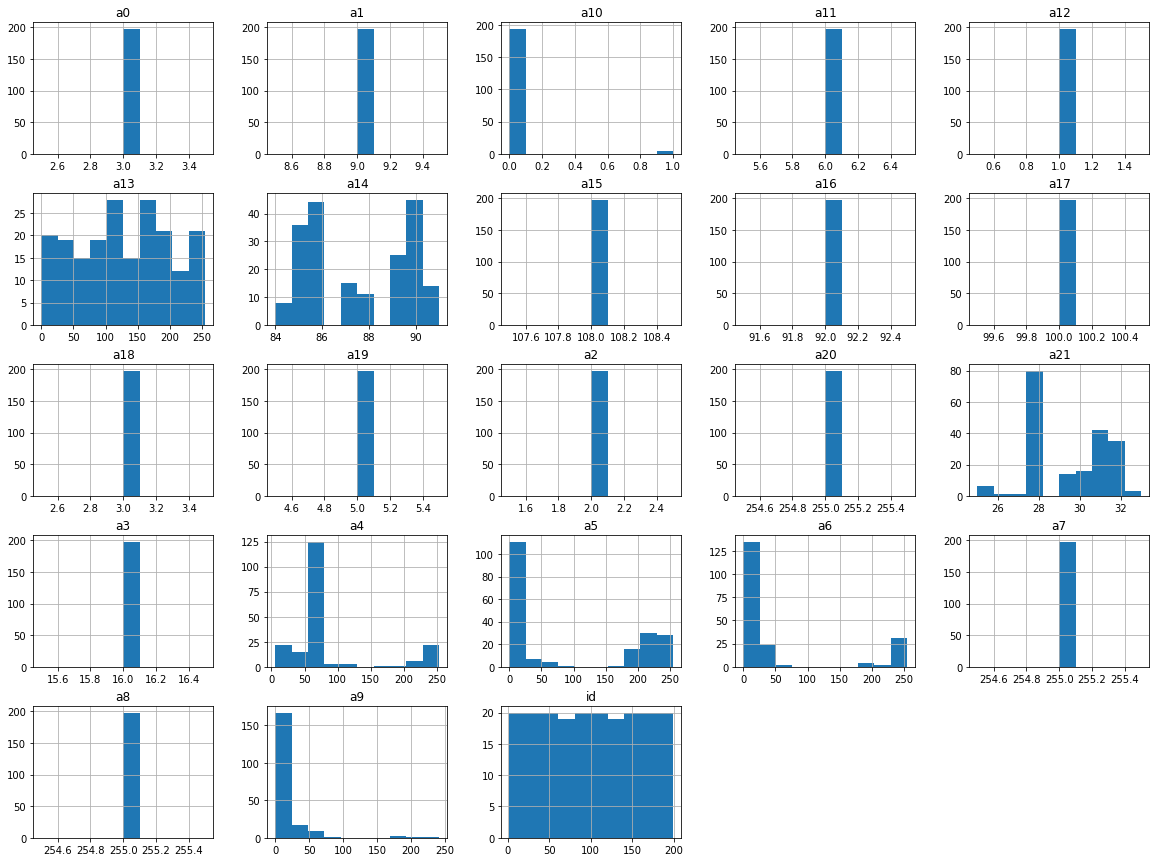

In [135]:

df.hist(figsize=(20,15))


In [136]:
unused = ["a0", "a1", "a11", "a12", "a15",
          "a16", "a17", "a18", "a19", "a2", "a20", "a3", "a7", "a8"]
          #"a10", "a21", "a14"]

In [137]:
to_drop = ['TimeStamp', 'id' ] + unused
df.drop(to_drop, axis = 1, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb08d61bdd8>,
      dtype=object)

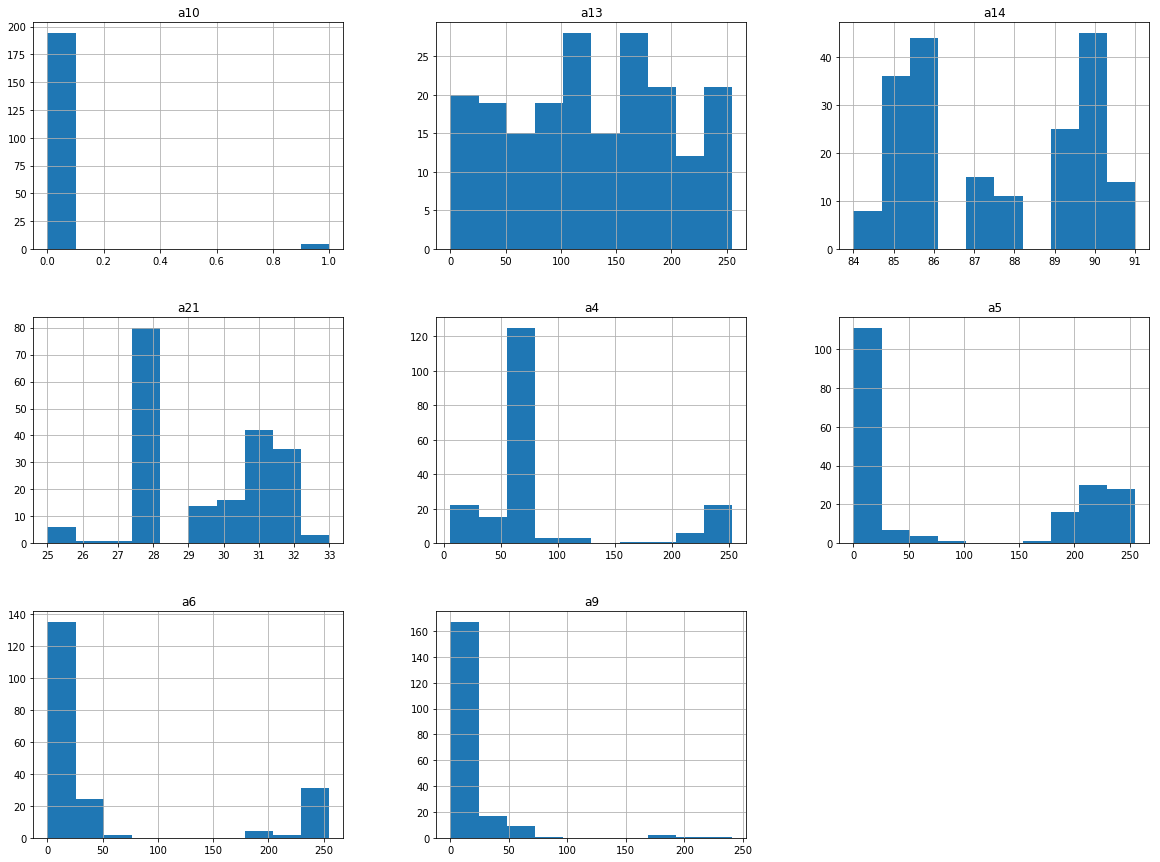

In [138]:

df.hist(figsize=(20,15))


<Figure size 432x288 with 0 Axes>

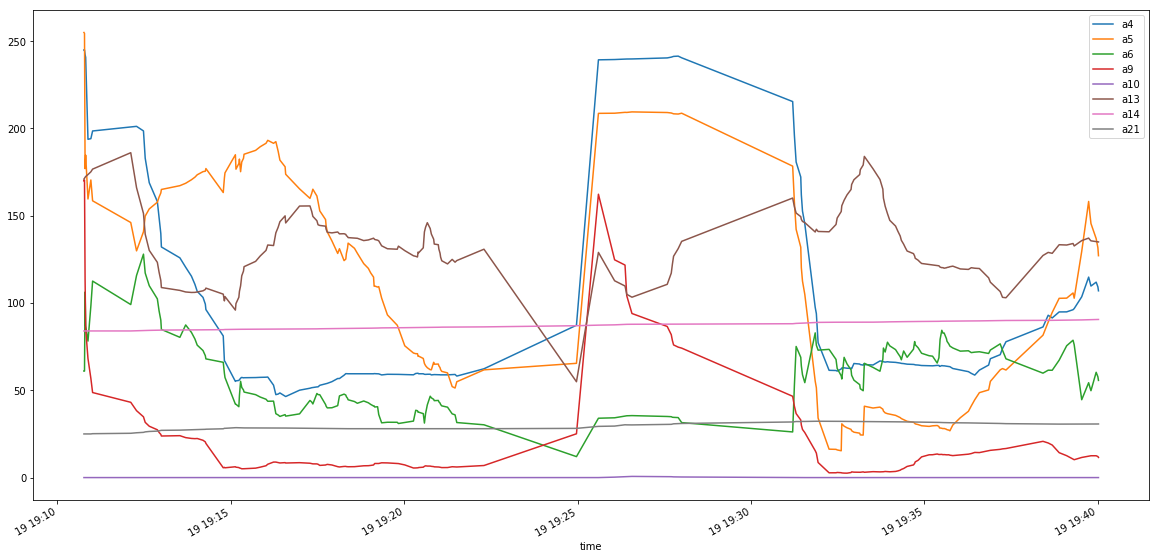

In [140]:
# Plot timesries data
import matplotlib.pyplot as plt

%matplotlib inline

#df_c = df.rolling(10,  min_periods=1).mean()
#df_c = df[["a4", "a5", "a6"]].rolling(10).sum()#.cumsum()
df_c = df.rolling('240s').mean()#.cumsum()

plt.figure();

df_c.plot(figsize=(20,10),sort_columns=True, logy=False);

plt.savefig('plots/mydb_plot.png', format='png', dpi=300)

In [116]:
def main(database):
 
    # create a database connection
    conn = create_connection(database)
    with conn:
        print("2. Query all tasks")
        ## select_all_tasks(conn)
        df =read_as_df(conn)
    return df

database = "./mydb_2.sqlite3"
df = main(database)
df.head()

2. Query all tasks


,id,time,_0,_1,_2,_3,_4,_5,_6,_7,...,_12,_13,_14,_15,_16,_17,_18,_19,_20,_21
0,1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-02-19 21:56:21,3.0,9.0,2.0,16.0,0.0,1.0,63.0,255.0,...,1.0,122.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0
2,3,2019-02-19 21:56:22,3.0,9.0,2.0,16.0,0.0,1.0,62.0,255.0,...,1.0,123.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0
3,4,2019-02-19 21:56:24,3.0,9.0,2.0,16.0,0.0,2.0,62.0,255.0,...,1.0,125.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0
4,5,2019-02-19 21:56:27,3.0,9.0,2.0,16.0,0.0,1.0,63.0,255.0,...,1.0,128.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0


In [114]:
df.columns

Index(['id', 'time', '_0', '_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8',
       '_9', '_10', '_11', '_12', '_13', '_14', '_15', '_16', '_17', '_18',
       '_19', '_20', '_21'],
      dtype='object')

In [117]:
df.drop(df.index[0], inplace=True)

In [118]:
## FIX DATETIME, resampling
datetime_rowid = df['time'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid
df.head(10)

,id,time,_0,_1,_2,_3,_4,_5,_6,_7,...,_12,_13,_14,_15,_16,_17,_18,_19,_20,_21
time,,,,,,,,,,,,,,,,,,,,,
2019-02-19 21:56:21,2,2019-02-19 21:56:21,3.0,9.0,2.0,16.0,0.0,1.0,63.0,255.0,...,1.0,122.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0
2019-02-19 21:56:22,3,2019-02-19 21:56:22,3.0,9.0,2.0,16.0,0.0,1.0,62.0,255.0,...,1.0,123.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0
2019-02-19 21:56:24,4,2019-02-19 21:56:24,3.0,9.0,2.0,16.0,0.0,2.0,62.0,255.0,...,1.0,125.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0
2019-02-19 21:56:27,5,2019-02-19 21:56:27,3.0,9.0,2.0,16.0,0.0,1.0,63.0,255.0,...,1.0,128.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0
2019-02-19 21:56:29,6,2019-02-19 21:56:29,3.0,9.0,2.0,16.0,1.0,2.0,62.0,255.0,...,1.0,130.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0
2019-02-19 21:56:33,7,2019-02-19 21:56:33,3.0,9.0,2.0,16.0,0.0,1.0,62.0,255.0,...,1.0,134.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0
2019-02-19 21:56:36,8,2019-02-19 21:56:36,3.0,9.0,2.0,16.0,0.0,2.0,63.0,255.0,...,1.0,137.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0
2019-02-19 21:56:37,9,2019-02-19 21:56:37,3.0,9.0,2.0,16.0,255.0,1.0,62.0,255.0,...,1.0,138.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0
2019-02-19 21:56:39,10,2019-02-19 21:56:39,3.0,9.0,2.0,16.0,0.0,1.0,62.0,255.0,...,1.0,140.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0


In [119]:
## CHANGE COLUMN NAMES
df.columns = ['id', 'TimeStamp', "a0","a1", "a2", "a3", "a4", "a5","a6", "a7", "a8",
              "a9", "a10","a11","a12", "a13", "a14", "a15","a16", "a17", "a18", "a19", "a20",
              "a21"]
df.head()

,id,TimeStamp,a0,a1,a2,a3,a4,a5,a6,a7,...,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21
time,,,,,,,,,,,,,,,,,,,,,
2019-02-19 21:56:21,2,2019-02-19 21:56:21,3.0,9.0,2.0,16.0,0.0,1.0,63.0,255.0,...,1.0,122.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0
2019-02-19 21:56:22,3,2019-02-19 21:56:22,3.0,9.0,2.0,16.0,0.0,1.0,62.0,255.0,...,1.0,123.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0
2019-02-19 21:56:24,4,2019-02-19 21:56:24,3.0,9.0,2.0,16.0,0.0,2.0,62.0,255.0,...,1.0,125.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0
2019-02-19 21:56:27,5,2019-02-19 21:56:27,3.0,9.0,2.0,16.0,0.0,1.0,63.0,255.0,...,1.0,128.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0
2019-02-19 21:56:29,6,2019-02-19 21:56:29,3.0,9.0,2.0,16.0,1.0,2.0,62.0,255.0,...,1.0,130.0,123.0,108.0,92.0,100.0,3.0,5.0,255.0,26.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb09266cd68>,
      dtype=object)

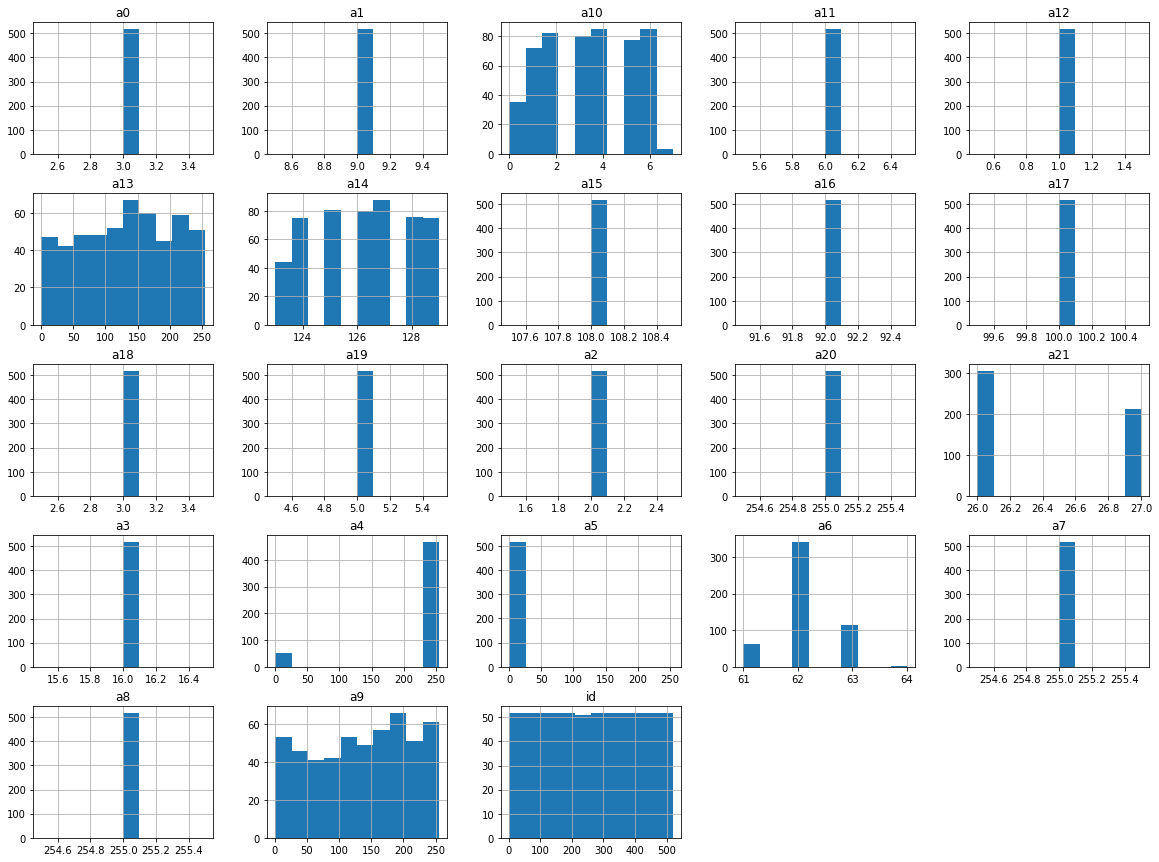

In [120]:

df.hist(figsize=(20,15))


In [122]:
unused = ["a0", "a1", "a11", "a12", "a15",
          "a16", "a17", "a18", "a19", "a2", "a20", "a3", "a7", "a8"]
          #"a10", "a21", "a14"
    


In [123]:
to_drop = ['TimeStamp', 'id' ] + unused

df.drop(to_drop, axis = 1, inplace = True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0921d1400>,
      dtype=object)

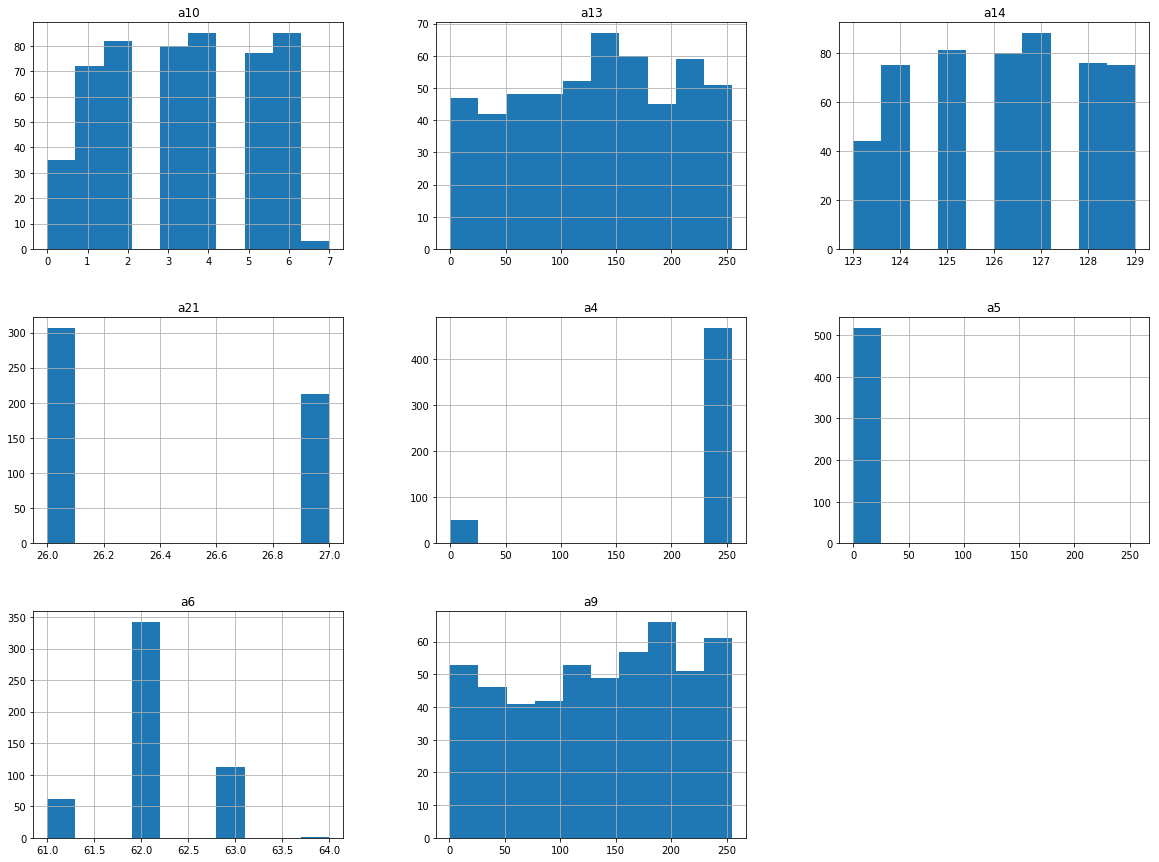

In [124]:

df.hist(figsize=(20,15))


<Figure size 432x288 with 0 Axes>

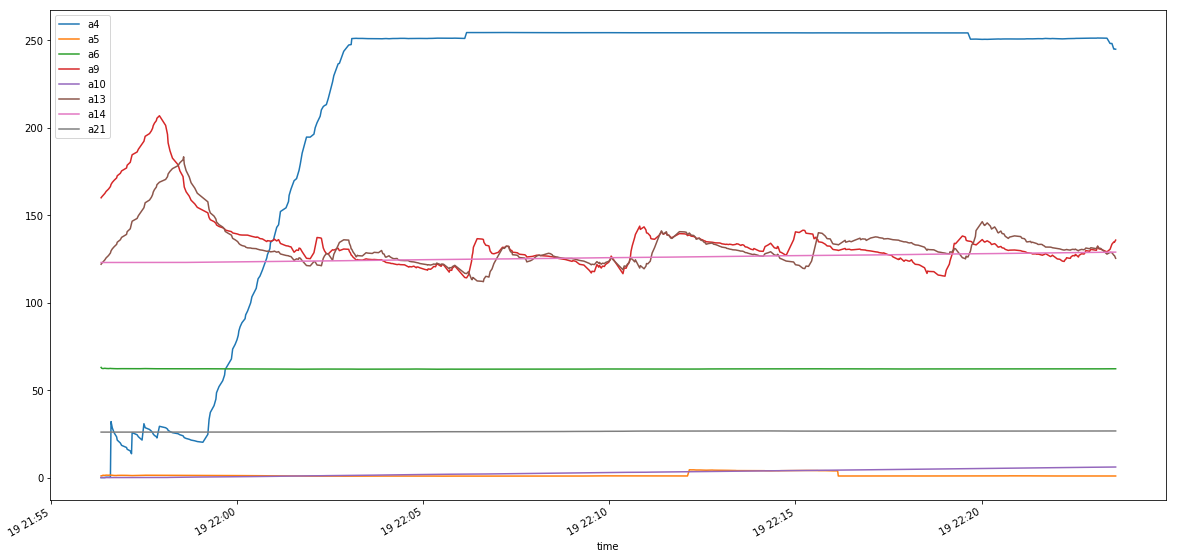

In [129]:
import matplotlib.pyplot as plt

%matplotlib inline

#df_c = df.rolling(10,  min_periods=1).mean()
#df_c = df[["a4", "a5", "a6"]].rolling(10).sum()#.cumsum()
df_c = df.rolling('240s').mean()#.cumsum()

plt.figure();

df_c.plot(figsize=(20,10),sort_columns=True, logy=False);

#plt.savefig('plots/mydb_2_plot_log.png', format='png', dpi=300)